### Importando os pacotes

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

### Carregando a base de treino

In [36]:
train = pd.read_csv("Train.csv")
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Analisando o a base de dados

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [38]:
train_describe = train.describe()
train_describe

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Verificando a contagem dos clientes que obtiveram o termo de depósito

In [39]:
train.y.value_counts().sort_index()

y
no     39922
yes     5289
Name: count, dtype: int64

### Nomeando a coluna Y

In [40]:
train.loc[train["y"]=="no","term_deposit"]=0
train.loc[train["y"]=="yes","term_deposit"]=1

### Boxplots para analisar a distribuição dos valores das nossas variáveis

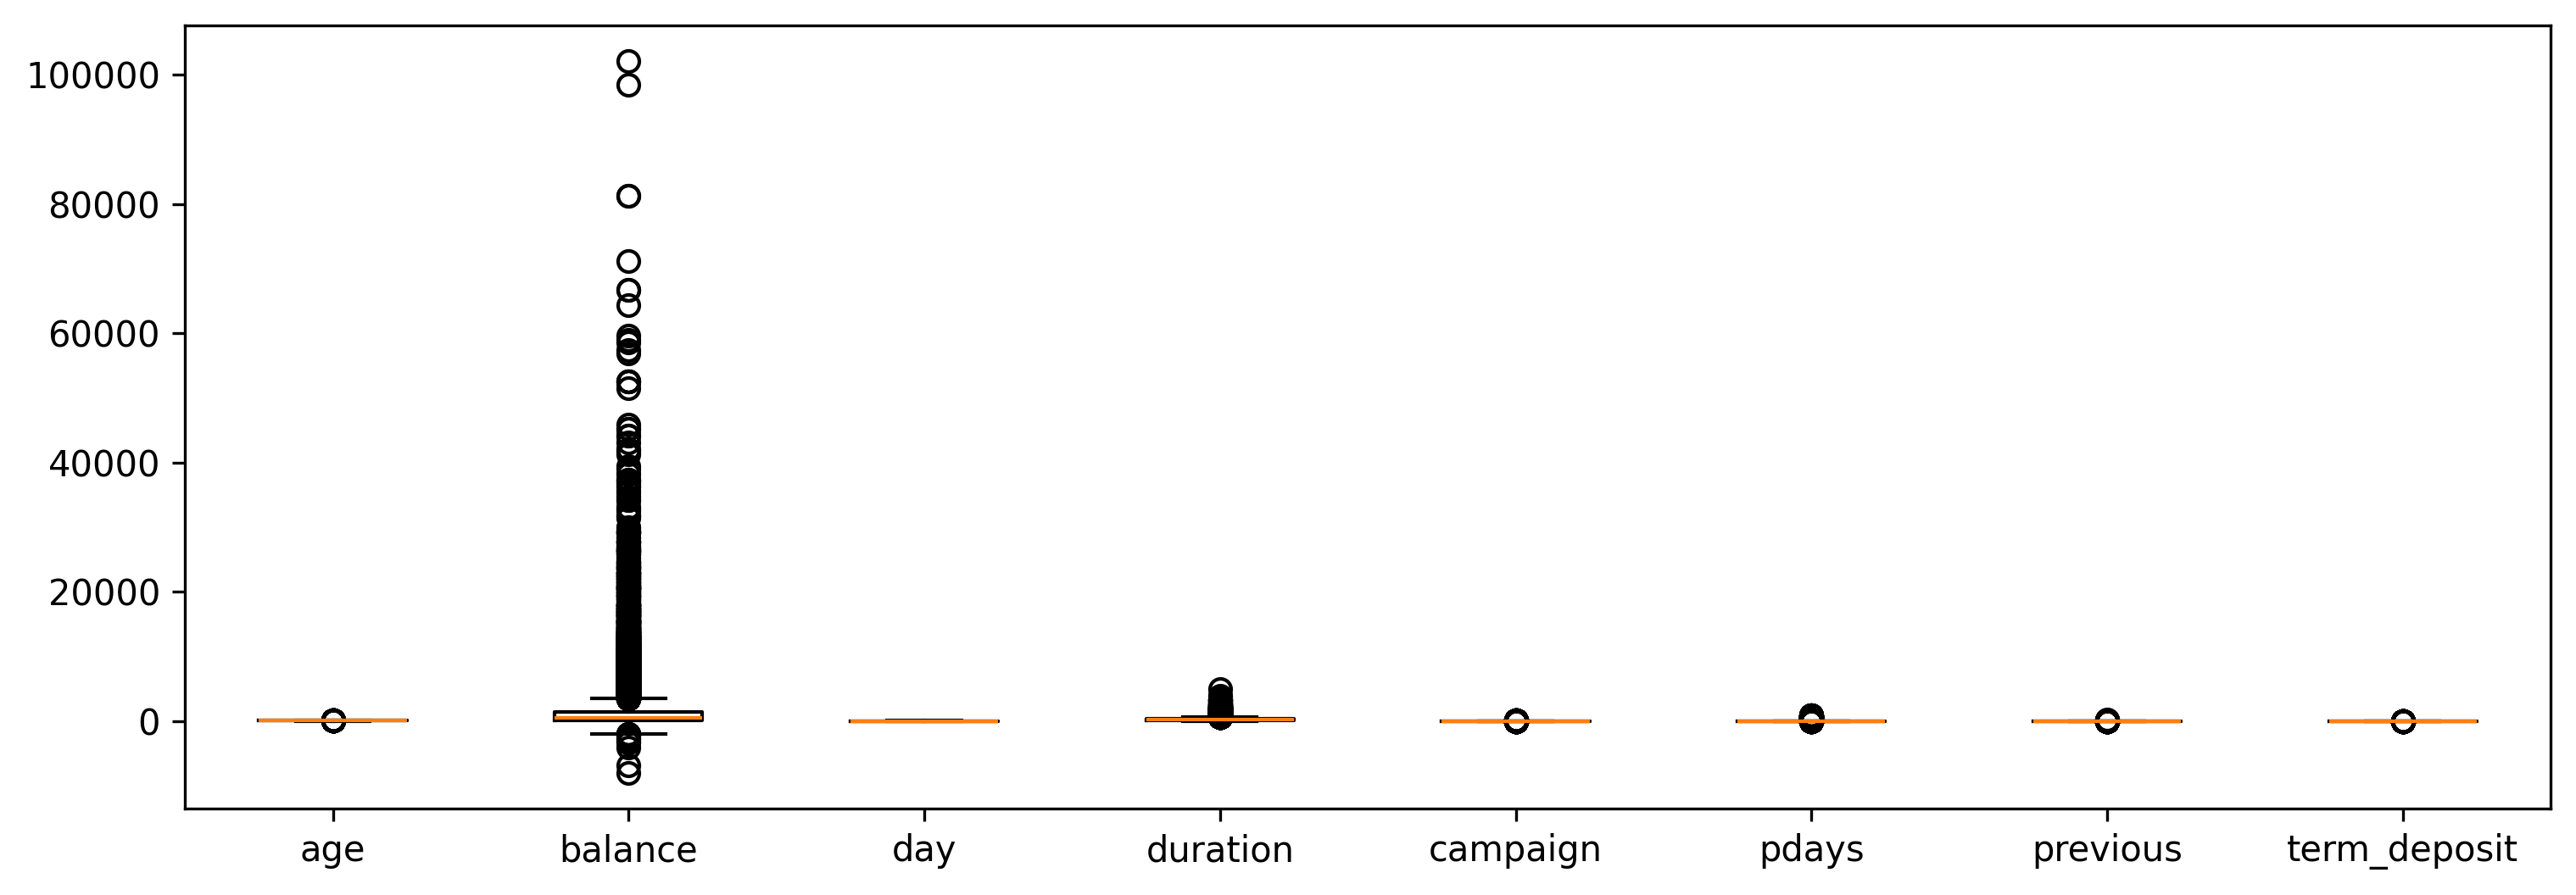

In [41]:
quantitative_columns = train.select_dtypes(include=[np.number])
plt.figure(figsize=(12,4),dpi=300)
plt.boxplot([quantitative_columns[col] for col in quantitative_columns.columns])
plt.xticks(range(1, len(quantitative_columns.columns) + 1), quantitative_columns.columns)
plt.show()


### Dropando as variáveis Balance(pelo grande número de outliers) e day(por provavelmente nos dar muito ruído nos dados)

In [42]:
train = train.drop("balance",axis=1)
train=train.drop("day",axis=1)

### Dummizando as variáveis

In [43]:
train_dummies = pd.get_dummies(train,
                                       columns=['job',
                                                'marital',
                                                'education',
                                                'default',
                                                'housing',
                                                'loan',
                                                'contact',
                                                'month',
                                                'poutcome'
                                                ],
                                       dtype=int,
                                       drop_first=True)

train_dummies

,age,duration,campaign,pdays,previous,y,term_deposit,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,261,1,-1,0,no,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,151,1,-1,0,no,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,76,1,-1,0,no,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,92,1,-1,0,no,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,198,1,-1,0,no,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,977,3,-1,0,yes,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,456,2,-1,0,yes,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,1127,5,184,3,yes,1.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,508,4,-1,0,no,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### Arrumando o nome das colunas dummizadas

In [44]:
train_dummies.columns = [col.replace("-","_") for col in train_dummies.columns]

### Criando nosso primeiro modelo

In [45]:
lista_colunas = list(train_dummies.drop(columns=['y','term_deposit']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "term_deposit ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

# Modelo propriamente dito
modelo_train = sm.Logit.from_formula(formula_dummies_modelo,
                                               train_dummies).fit()

# Parâmetros do 'modelo_fidelidade'
modelo_train.summary()

Fórmula utilizada:  term_deposit ~ age + duration + campaign + pdays + previous + job_blue_collar + job_entrepreneur + job_housemaid + job_management + job_retired + job_self_employed + job_services + job_student + job_technician + job_unemployed + job_unknown + marital_married + marital_single + education_secondary + education_tertiary + education_unknown + default_yes + housing_yes + loan_yes + contact_telephone + contact_unknown + month_aug + month_dec + month_feb + month_jan + month_jul + month_jun + month_mar + month_may + month_nov + month_oct + month_sep + poutcome_other + poutcome_success + poutcome_unknown
Optimization terminated successfully.
         Current function value: 0.238706
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           term_deposit   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           40
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.3385
Time:                        11:08:04   Log-Likelihood:                -10792.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.3574      0.178    -13.247      0.000      -2.706      -2.009
age                     0.0005      0.002      0.228      0.819      -0.004       0.005
duration                0.0042   6.45e-05     64.934      0.000       0.004       0.004
campaign               -0.0852      0.010     -8.510      0.000      -0.105      -0.066
pdays                  -0.0001      0.000     -0.391      0.695      -0.001       0.000
previous                0.0096      0.006      1.497      0.134      -0.003       0.022
job_blue_collar        -0.3131      0.073     -4.312      0.000      -0.455      -0.171
job_entrepreneur       -0.3595      0.126     -2.864      0.004      -0.606      -0.114
job_housemaid          -0.5006      0.136     -3.670      0.000      -0.768      -0.233
job_management         -0.1593      0.073     -2.176      0.030      -0.303      -0.016
job_retired             0.2558      0.097      2.635      0.008       0.065       0.446
job_self_employed      -0.2921      0.112     -2.611      0.009      -0.511      -0.073
job_services           -0.2265      0.084     -2.697      0.007      -0.391      -0.062
job_student             0.3878      0.109      3.565      0.000       0.175       0.601
job_technician         -0.1701      0.069     -2.470      0.014      -0.305      -0.035
job_unemployed         -0.1727      0.112     -1.546      0.122      -0.392       0.046
job_unknown            -0.3261      0.234     -1.395      0.163      -0.784       0.132
marital_married        -0.1761      0.059     -2.991      0.003      -0.291      -0.061
marital_single          0.0970      0.067      1.444      0.149      -0.035       0.229
education_secondary     0.1823      0.065      2.816      0.005       0.055       0.309
education_tertiary      0.3854      0.075      5.125      0.000       0.238       0.533
education_unknown       0.2540      0.104      2.448      0.014       0.051       0.457
default_yes            -0.0315      0.163     -0.194      0.846      -0.350       0.287
housing_yes            -0.6902      0.044    -15.774      0.000      -0.776      -0.604
loan_yes               -0.4386      0.060     -7.323      0.000      -0.556      -0.321
contact_telephone      -0.1631      0.075     -2.170      0.030      -0.310      -0.016
contact_unknown        -1.5901      0.073    -21.931      0.000      -1.732      -1.448
month_aug              -0.7409      0.078     -9.535      0.000      -0.893      -0.589
month_dec               0.6468      0.176      3.677      0.000       0.302       0.992
month_feb              -0.2663      0.084     -3.157      0.002      -0.432      -0.101
month_jan              -1.1861      0.120     -9.899      0.000      -1.421      -0.951
month_jul              -0.8419      0.077    -10.897      0.000      -0.993      -0.690
month_jun               0.3589      0.090      3.975      0.000       0.182       0.536
month_mar               1.5451      0.119     12.984      0.000       1.3

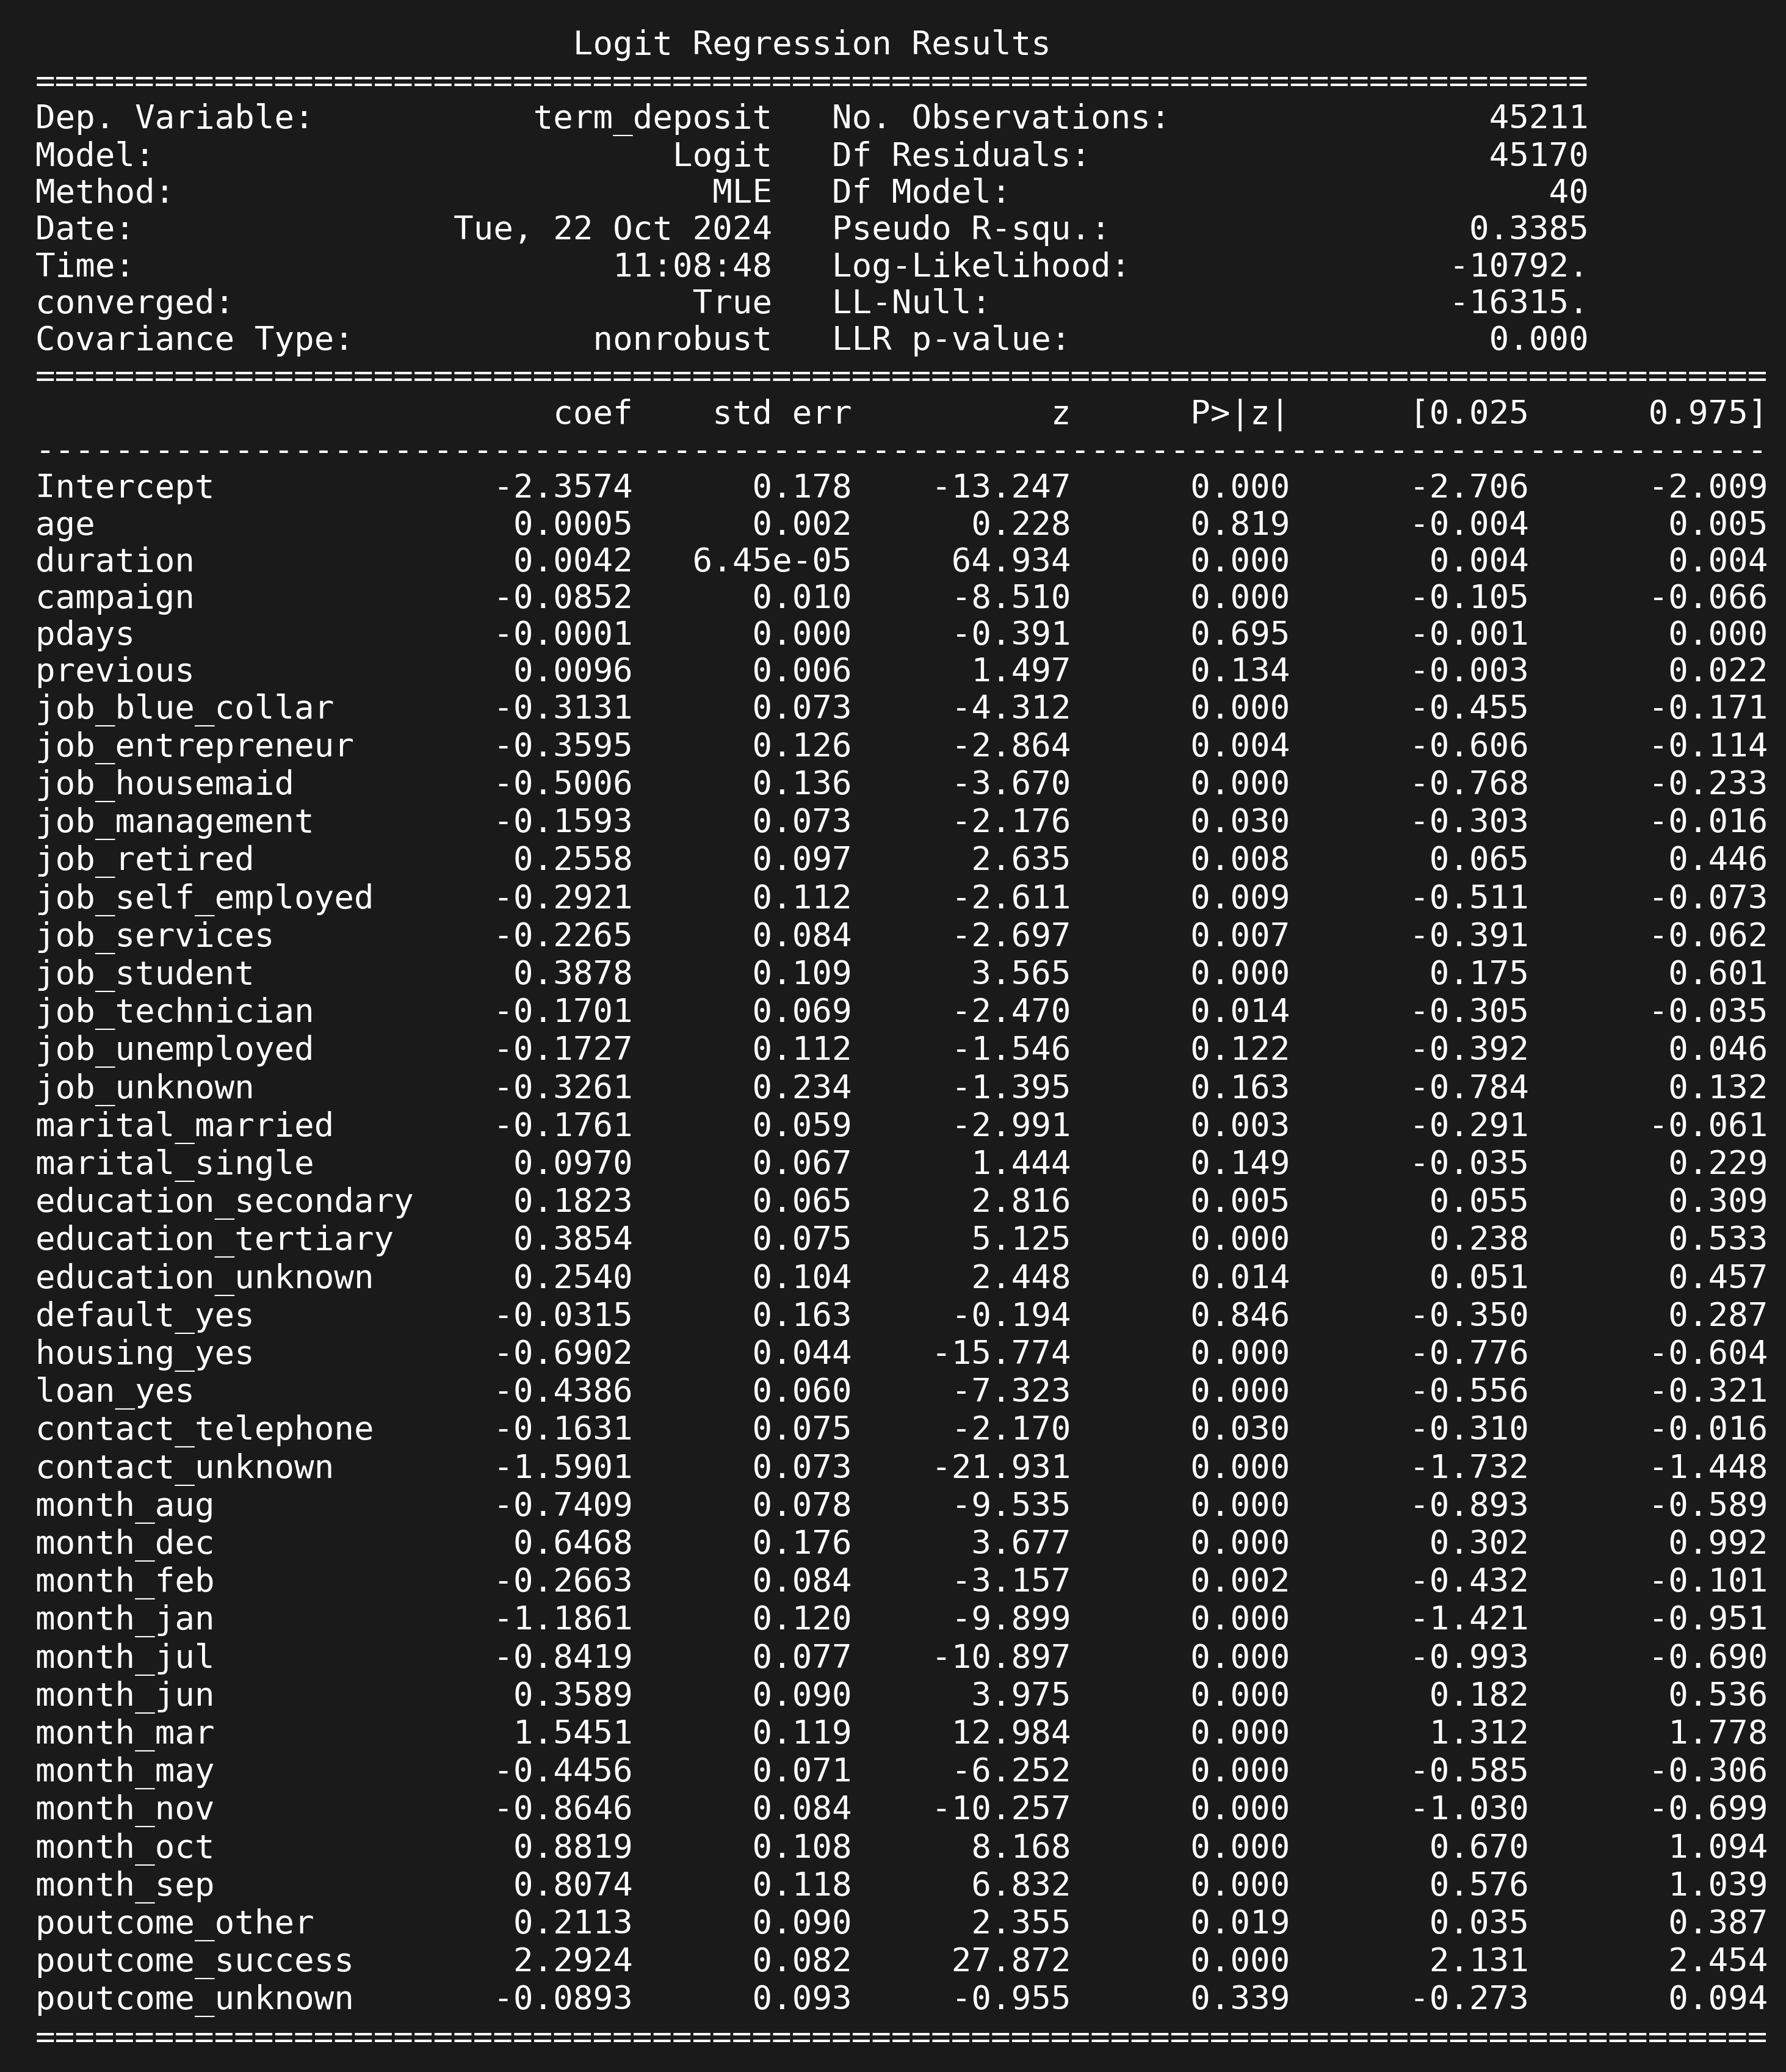

In [46]:

# Obtém o resumo completo como string
summary_text = str(modelo_train.summary())

# Configura a figura com tamanho apropriado e DPI, além da cor de fundo preta
fig = plt.figure(figsize=(12, 8), dpi=300)
fig.patch.set_facecolor('#1A1A1A')  # Fundo da figura

# Adiciona o texto com o resumo do modelo, ajustando a cor para branco
plt.text(0.01, 0.99, summary_text, {'family': 'monospace', 'size': 13}, va='top', ha='left', color="white")

# Remove os eixos
plt.axis('off')

# Define a cor de fundo da área de plotagem (ax)
plt.gca().set_facecolor('black')

# Mostra o gráfico
plt.show()

### Criando o modelo stepwise para identificar as melhores variáveis para ficarem no modelo

In [47]:
#%% # Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
step_train = stepwise(modelo_train, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 term_deposit ~ Q('age') + Q('duration') + Q('campaign') + Q('pdays') + Q('previous') + Q('job_blue_collar') + Q('job_entrepreneur') + Q('job_housemaid') + Q('job_management') + Q('job_retired') + Q('job_self_employed') + Q('job_services') + Q('job_student') + Q('job_technician') + Q('job_unemployed') + Q('job_unknown') + Q('marital_married') + Q('marital_single') + Q('education_secondary') + Q('education_tertiary') + Q('education_unknown') + Q('default_yes') + Q('housing_yes') + Q('loan_yes') + Q('contact_telephone') + Q('contact_unknown') + Q('month_aug') + Q('month_dec') + Q('month_feb') + Q('month_jan') + Q('month_jul') + Q('month_jun') + Q('month_mar') + Q('month_may') + Q('month_nov') + Q('month_oct') + Q('month_sep') + Q('poutcome_other') + Q('poutcome_success') + Q('poutcome_unknown')
Optimization terminated successfully.
         Current function value: 0.238706
         Iterations 8

 Discarding atribute "Q('default_yes')" with p

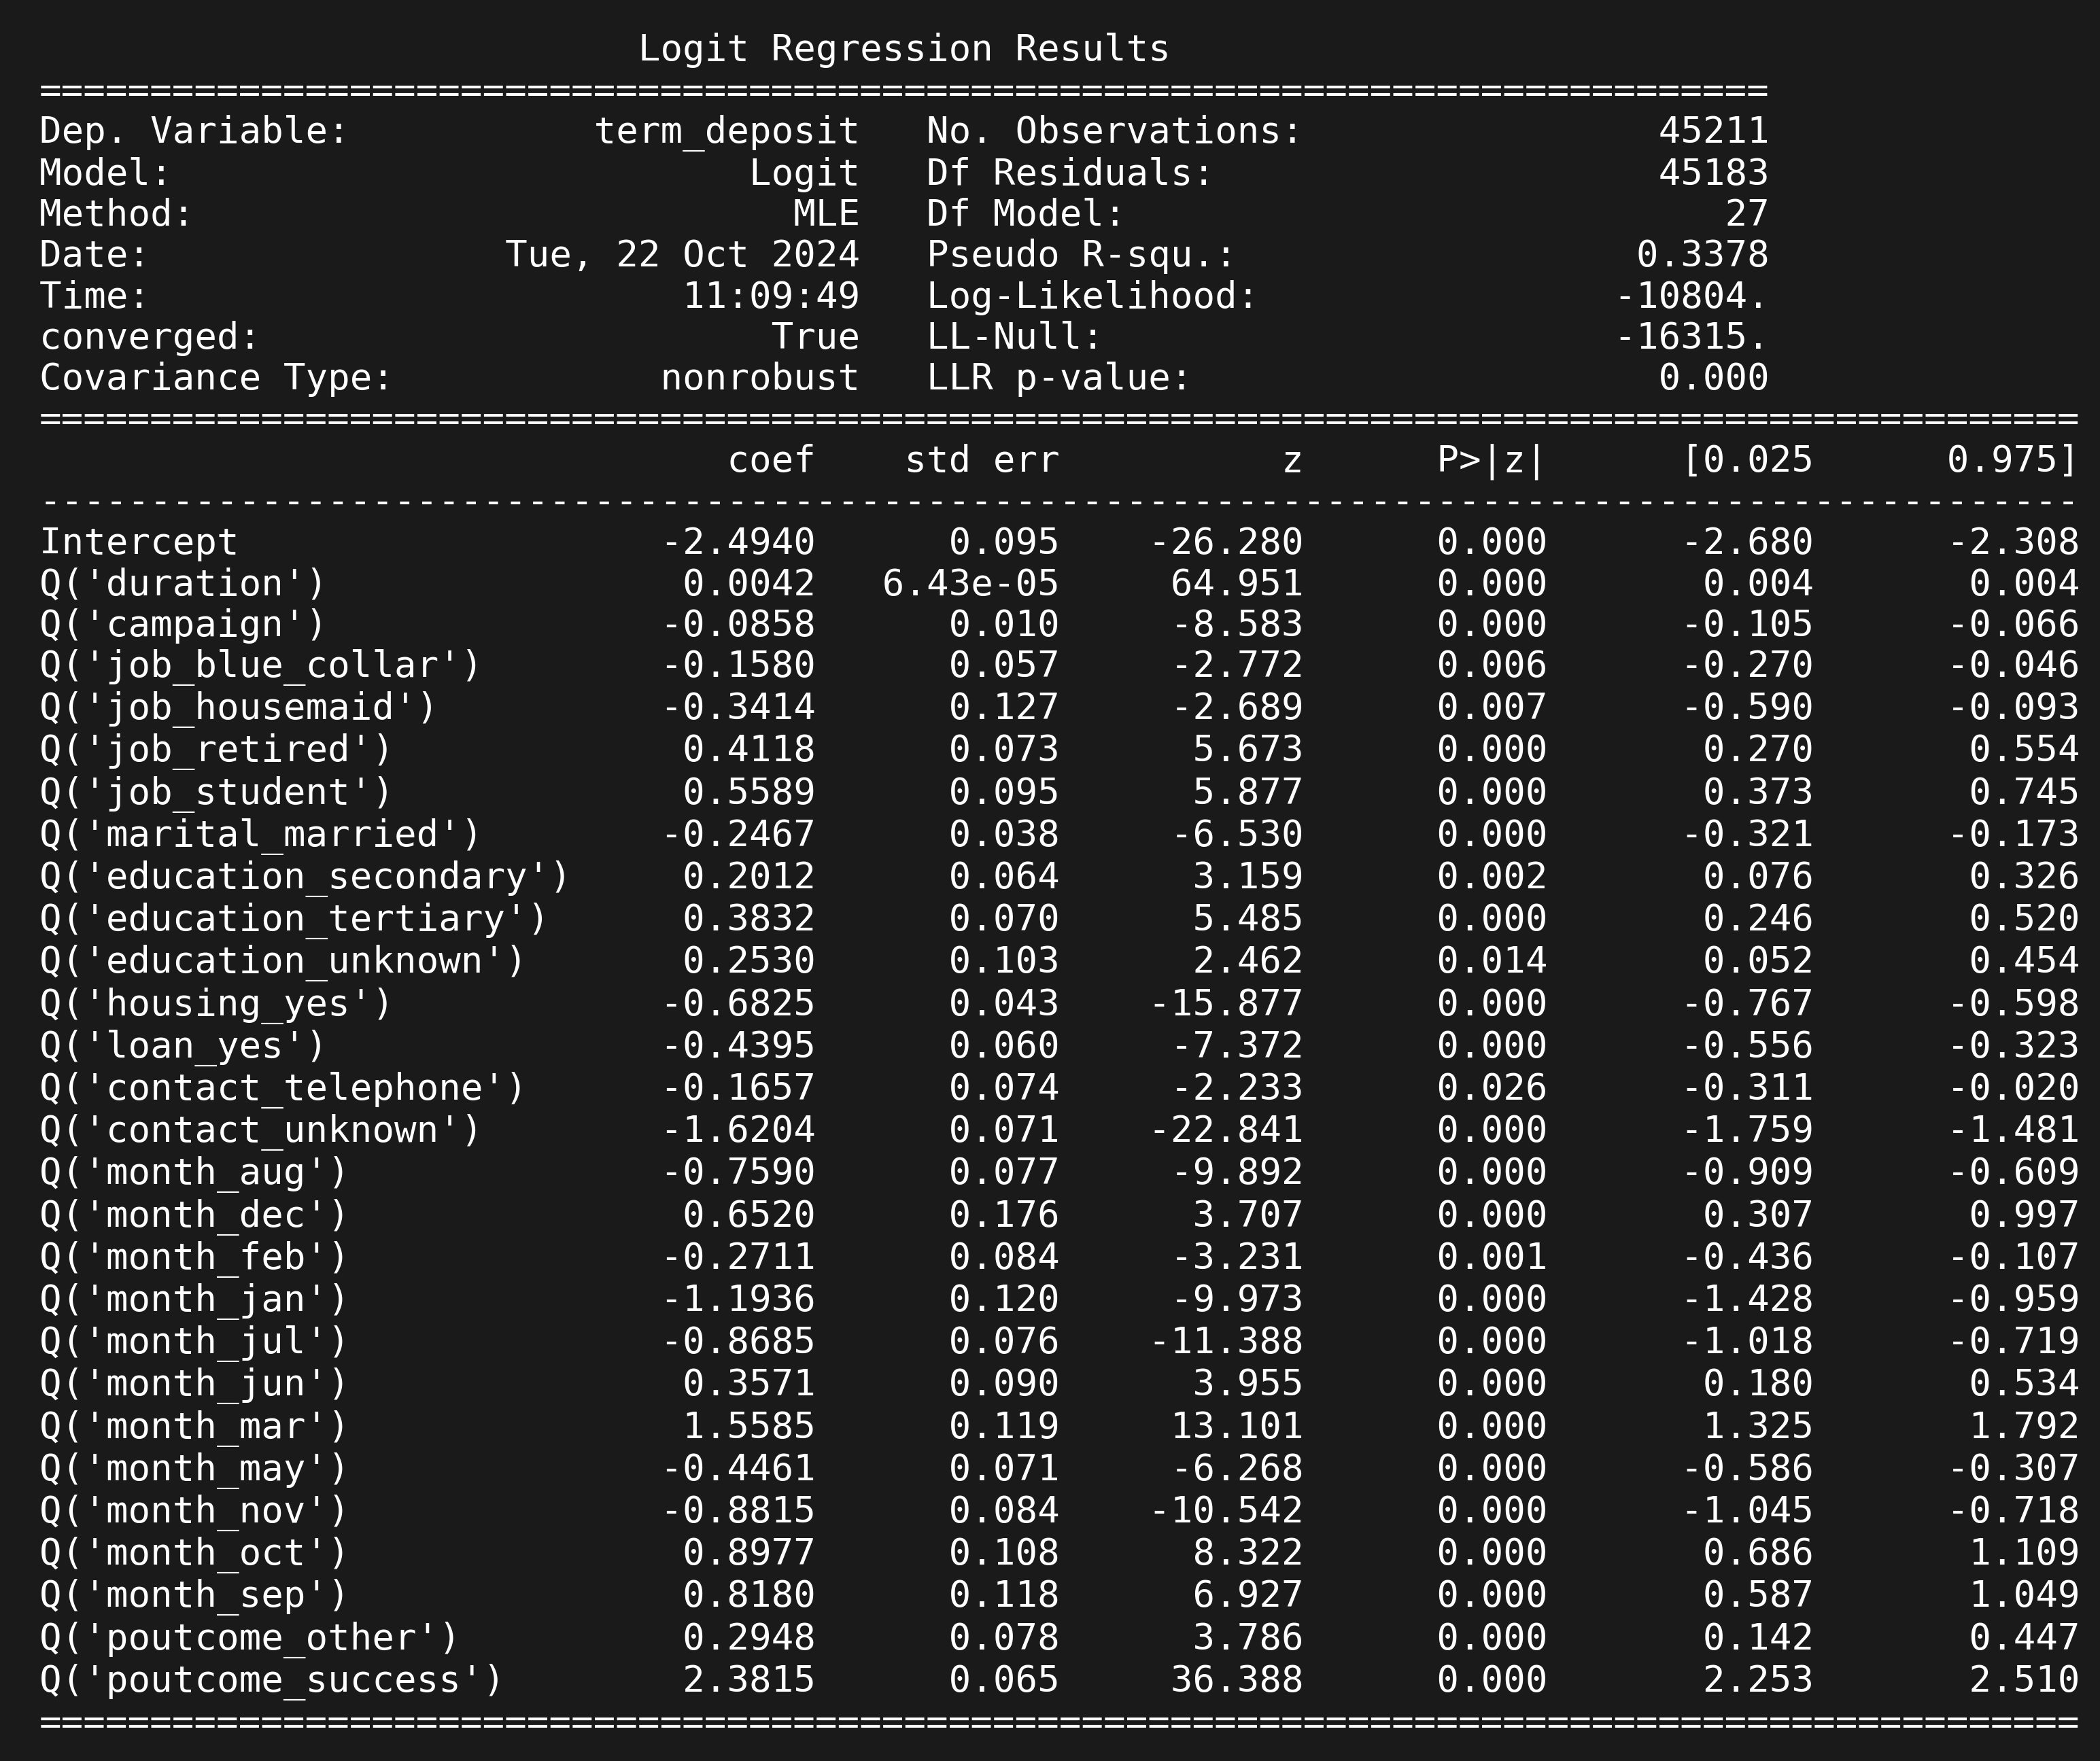

In [48]:
# Obtém o resumo completo como string
summary_text_step = str(step_train.summary())

# Configura a figura com tamanho apropriado e DPI, além da cor de fundo preta
fig = plt.figure(figsize=(12, 8), dpi=300)
fig.patch.set_facecolor('#1A1A1A')  # Fundo da figura

# Adiciona o texto com o resumo do modelo, ajustando a cor para branco
plt.text(0.01, 0.99, summary_text_step, {'family': 'monospace', 'size': 13}, va='top', ha='left', color="white")

# Remove os eixos
plt.axis('off')

# Define a cor de fundo da área de plotagem (ax)
plt.gca().set_facecolor('black')

# Mostra o gráfico
plt.show()

### Ordenando os Betas em ordem numérica para analisar quais foram mais impactantes pro nosso modelo

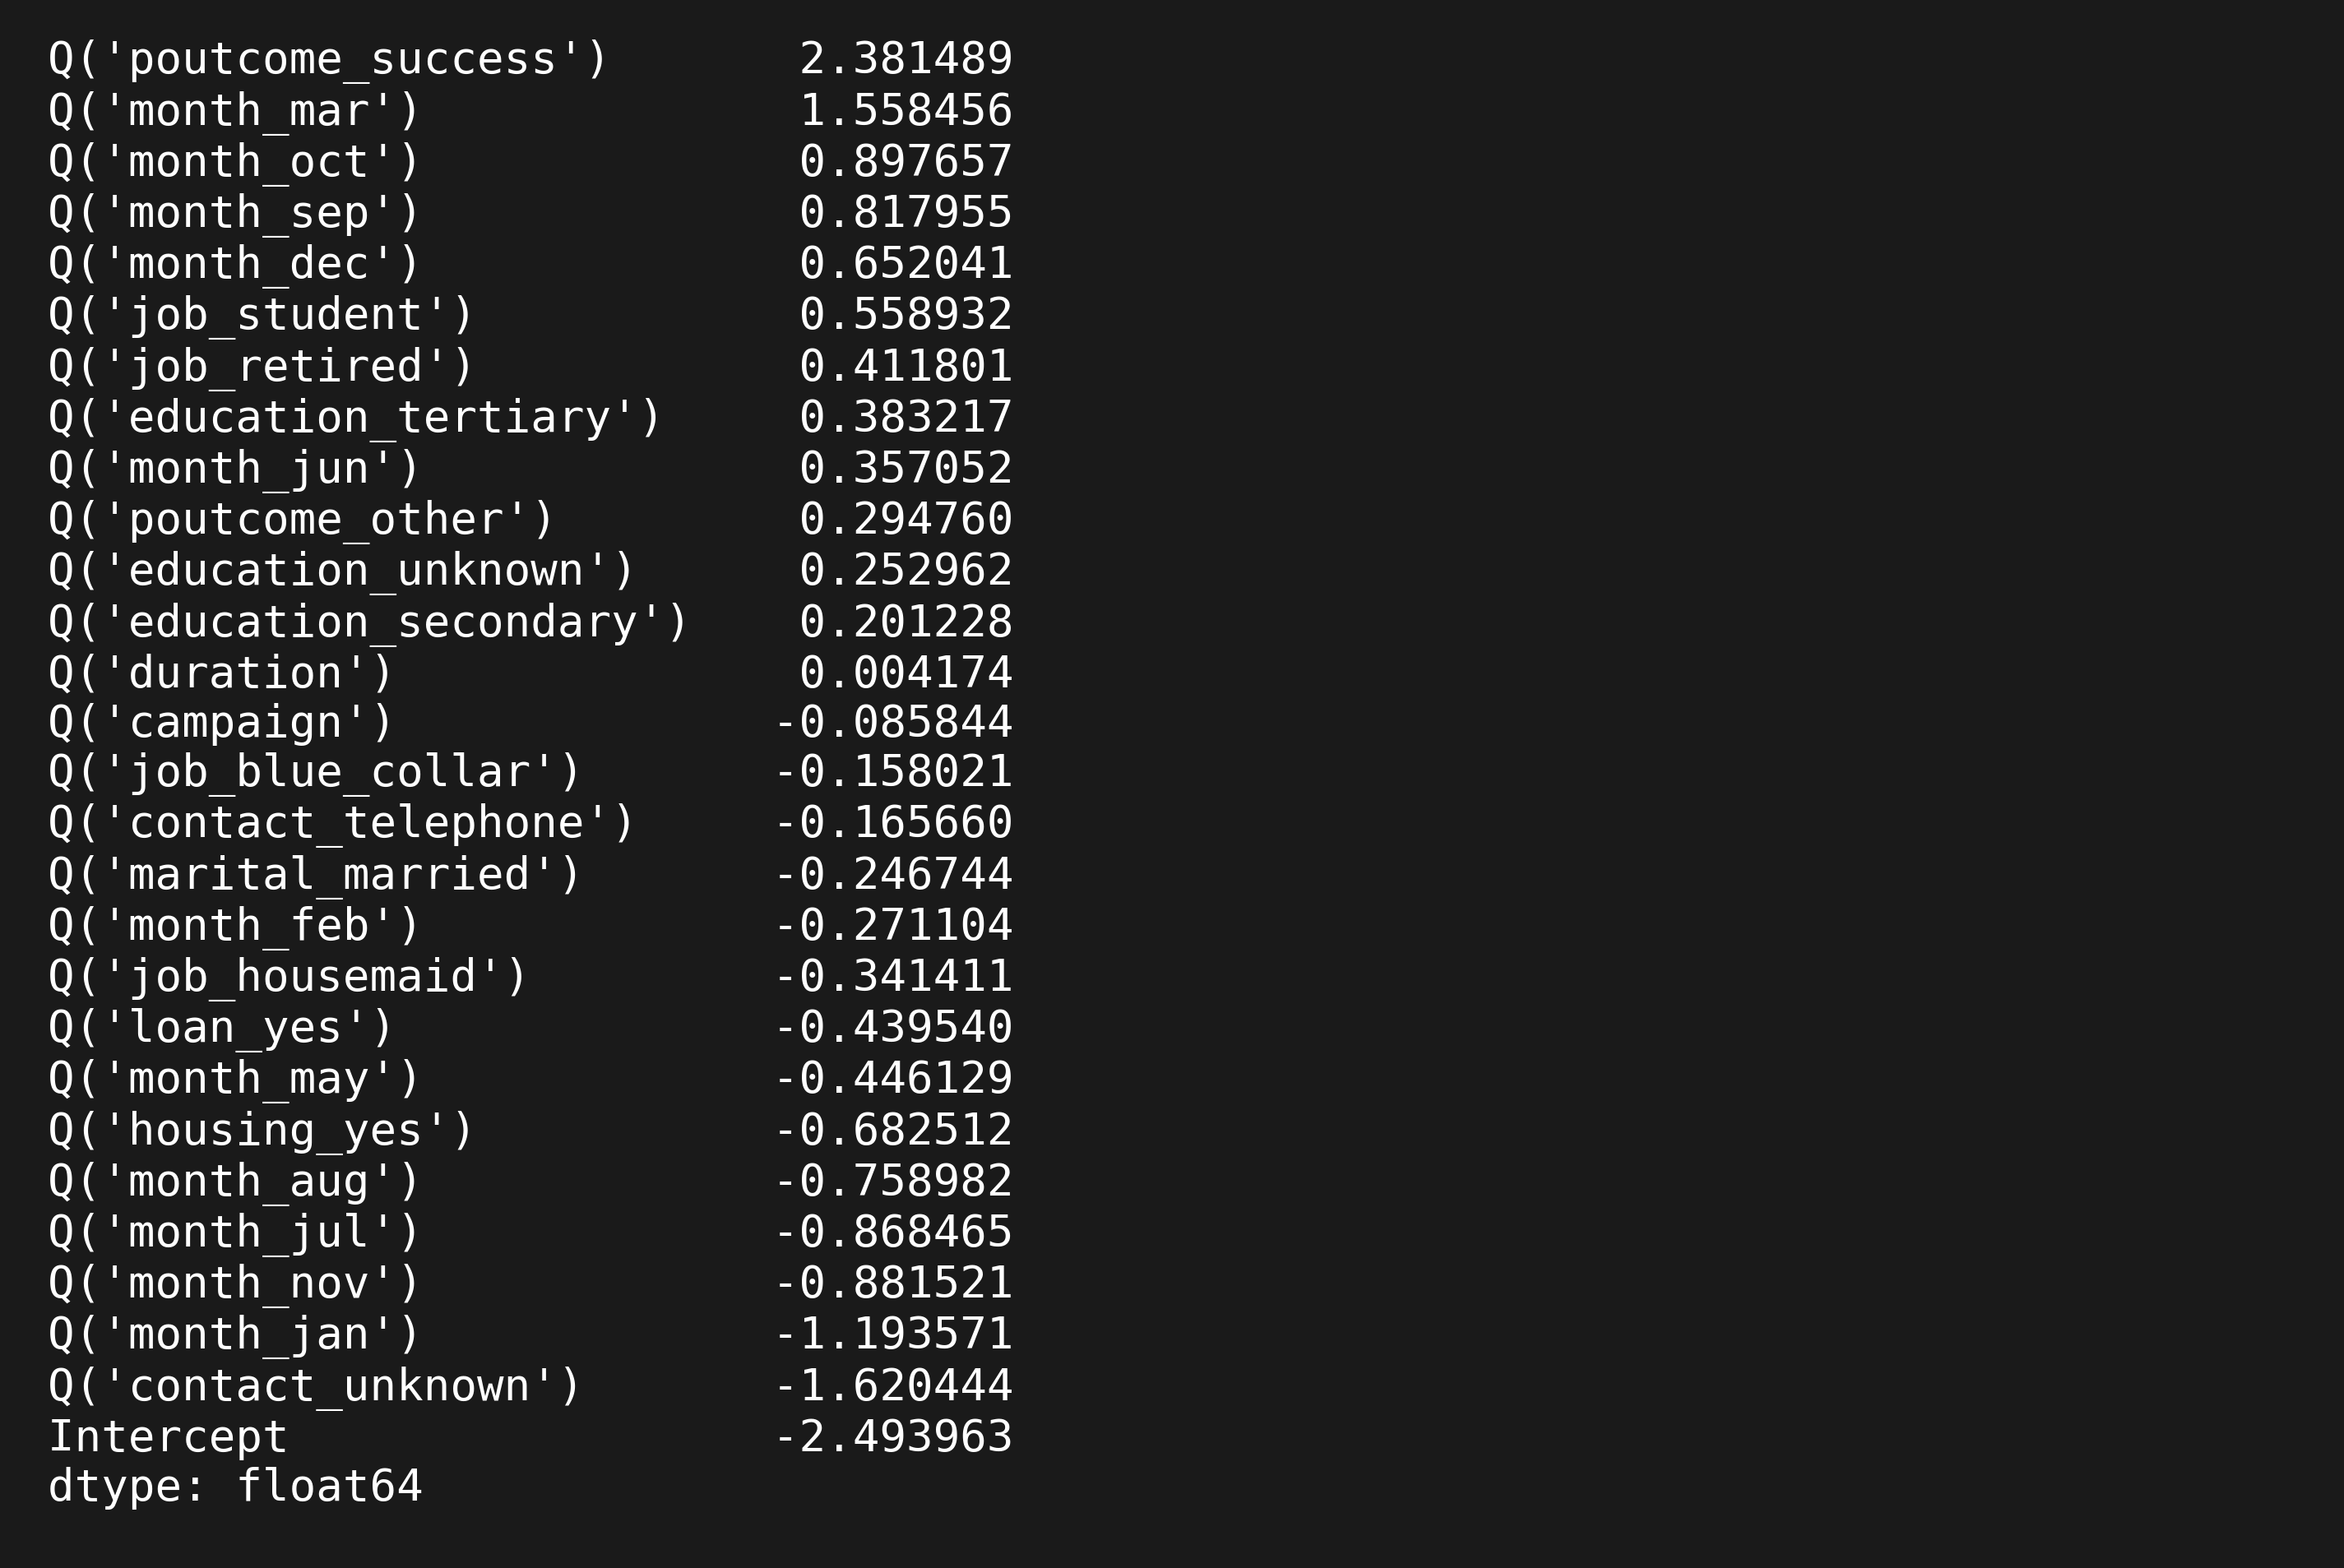

In [49]:
step_train.params.sort_values(ascending=False).abs()

# Obtém o resumo completo como string
params_text = str(step_train.params.sort_values(ascending=False))

# Configura a figura com tamanho apropriado e DPI, além da cor de fundo preta
fig = plt.figure(figsize=(12, 8), dpi=300)
fig.patch.set_facecolor('#1A1A1A')  # Fundo da figura

# Adiciona o texto com o resumo do modelo, ajustando a cor para branco
plt.text(0.01, 0.99, params_text, {'family': 'monospace', 'size': 13}, va='top', ha='left', color="white")

# Remove os eixos
plt.axis('off')

# Define a cor de fundo da área de plotagem (ax)
plt.gca().set_facecolor('black')

# Mostra o gráfico
plt.show()

### Selecionando as colunas que ficaram no modelo final (Treino)

In [51]:
import re

step_columns=step_train.params


step_columns.index = [re.sub(r"Q\('(\w+)'\)", r'\1', str(col)) for col in step_columns.index]

step_columns = step_columns.drop("Intercept")


step_columns = step_columns.index

step_columns = step_columns.tolist()

step_columns

['duration',
 'campaign',
 'job_blue_collar',
 'job_housemaid',
 'job_retired',
 'job_student',
 'marital_married',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success']

### Criando um predict para nosso modelo de treino

In [52]:
train['phat'] = step_train.predict()

train

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,term_deposit,phat
0,58,management,married,tertiary,no,yes,no,unknown,may,261,1,-1,0,unknown,no,0.0,0.016256
1,44,technician,single,secondary,no,yes,no,unknown,may,151,1,-1,0,unknown,no,0.0,0.011016
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,may,76,1,-1,0,unknown,no,0.0,0.004084
3,47,blue-collar,married,unknown,no,yes,no,unknown,may,92,1,-1,0,unknown,no,0.0,0.006080
4,33,unknown,single,unknown,no,no,no,unknown,may,198,1,-1,0,unknown,no,0.0,0.027467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,no,cellular,nov,977,3,-1,0,unknown,yes,1.0,0.641466
45207,71,retired,divorced,primary,no,no,no,cellular,nov,456,2,-1,0,unknown,yes,1.0,0.225849
45208,72,retired,married,secondary,no,no,no,cellular,nov,1127,5,184,3,success,yes,1.0,0.974605
45209,57,blue-collar,married,secondary,no,no,no,telephone,nov,508,4,-1,0,unknown,no,0.0,0.122655


### Criando a matriz de confusão com um cutoff de 0,12

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1) 
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Modelo Treino: Cutoff = {cutoff},  Acurácia = {accuracy_score(observado, predicao_binaria):.2f}", loc="center")
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    # plt.text(0.01, 0.99, f"Acurácia {accuracy_score(observado, predicao_binaria)})", {'family': 'monospace', 'size': 13}, va='bottom', ha='center', color="black")
    
    
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

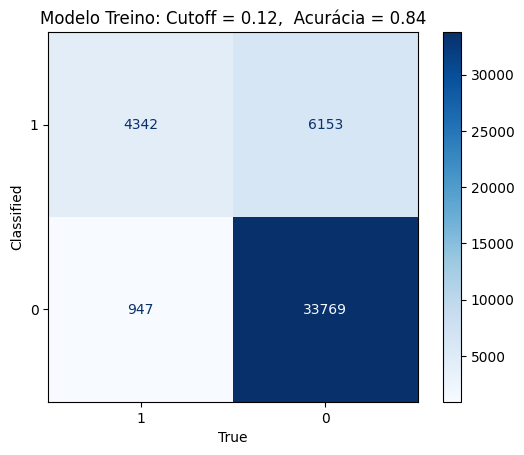

,Sensitividade,Especificidade,Acurácia
0,0.820949,0.845874,0.842959


In [54]:
# Adicionando os valores previstos de probabilidade na base de dados
train_dummies['phat'] = step_train.predict()

# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=train_dummies['term_deposit'],
                predicts=train_dummies['phat'],
                cutoff=0.12)

### Criando a curva ROC para verificar a qualidade do modelo

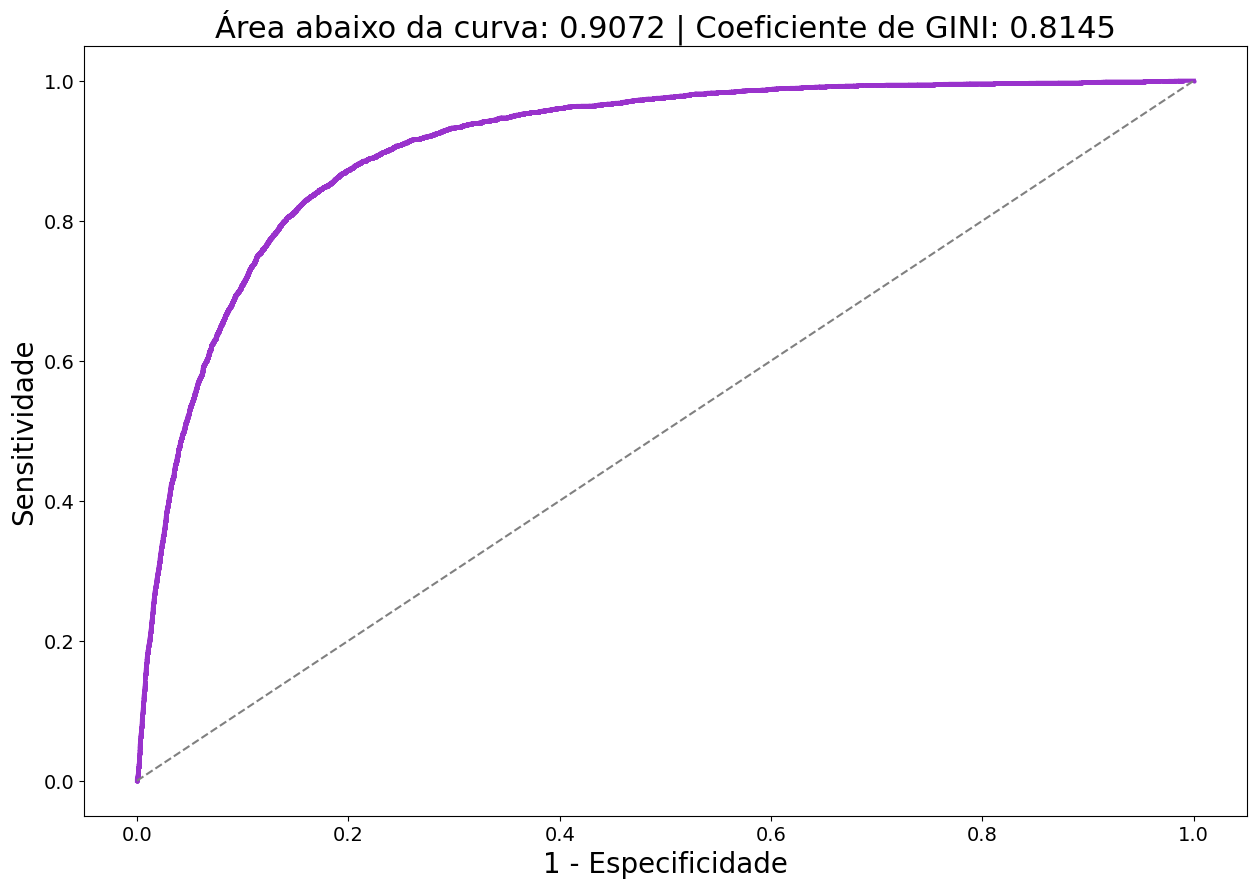

In [58]:
from sklearn.metrics import roc_curve, auc

# Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(train['term_deposit'], train['phat'])
roc_auc = auc(fpr, tpr)

# Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotando a curva ROC
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=2, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensitividade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()


### Arredondando os valores do phat com o cutoff para obter a predição final

In [60]:
train_dummies['phat2'] = np.where(train_dummies['phat'] >= 0.12, 1, 0)

train_dummies['phat2']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    1
45210    1
Name: phat2, Length: 45211, dtype: int32

### Comparando a acurácia "na mão"

In [62]:
# Comparando phat2 com term_deposit e criando uma nova coluna 'acerto'
train_dummies['acerto'] = np.where(train_dummies['phat2'] == train_dummies['term_deposit'], 1, 0)

# Visualizando as primeiras linhas para ver a comparação
print(train_dummies[['phat2', 'term_deposit', 'acerto']].head(30))

# Calculando a taxa de acerto (acurácia)
acuracia = train_dummies['acerto'].mean()
print(f'Acurácia: {acuracia * 100:.2f}%')

    phat2  term_deposit  acerto
0       0           0.0       1
1       0           0.0       1
2       0           0.0       1
3       0           0.0       1
4       0           0.0       1
5       0           0.0       1
6       0           0.0       1
7       0           0.0       1
8       0           0.0       1
9       0           0.0       1
10      0           0.0       1
11      0           0.0       1
12      0           0.0       1
13      0           0.0       1
14      0           0.0       1
15      0           0.0       1
16      0           0.0       1
17      0           0.0       1
18      0           0.0       1
19      0           0.0       1
20      0           0.0       1
21      0           0.0       1
22      0           0.0       1
23      0           0.0       1
24      0           0.0       1
25      0           0.0       1
26      0           0.0       1
27      0           0.0       1
28      0           0.0       1
29      0           0.0       1
Acurácia

### Os resutlados finais em conjunto com os valores originais do dataset de treino

In [65]:
train_result = train_dummies[["term_deposit","phat2"]]
train_result

,term_deposit,phat2
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
45206,1.0,1
45207,1.0,1
45208,1.0,1
45209,0.0,1


### Carregando nosso dataset de teste

In [66]:
test = pd.read_csv("test.csv")

### Fazendo os mesmos tratamentos do dataset de treino

In [67]:
test.loc[test["y"]=="no","term_deposit"]=0
test.loc[test["y"]=="yes","term_deposit"]=1

test = test.drop("balance",axis=1)
test=test.drop("day",axis=1)

### Dummizando e arrumando os nomes das colunas

In [68]:
test_dummies = pd.get_dummies(test,
                                       columns=['job',
                                                'marital',
                                                'education',
                                                'default',
                                                'housing',
                                                'loan',
                                                'contact',
                                                'month',
                                                'poutcome'
                                                ],
                                       dtype=int,
                                       drop_first=True)

test_dummies

,age,duration,campaign,pdays,previous,y,term_deposit,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,79,1,-1,0,no,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,220,1,339,4,no,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,185,1,330,1,no,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,199,4,-1,0,no,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,226,1,-1,0,no,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,329,5,-1,0,no,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4517,57,153,1,-1,0,no,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4518,57,151,11,-1,0,no,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,129,4,211,3,no,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
test_dummies.columns = [col.replace("-","_") for col in test_dummies.columns]

### Matriz de confusão pro modelo de teste

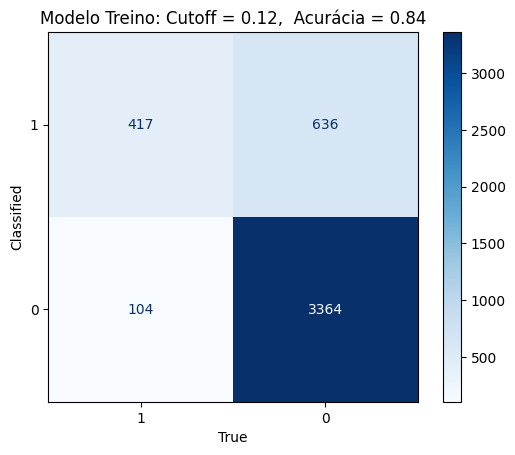

,Sensitividade,Especificidade,Acurácia
0,0.800384,0.841,0.836319


In [70]:
test['phat'] = modelo_train.predict(test_dummies)

# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=test['term_deposit'],
                predicts=test['phat'],
                cutoff=0.12)

### Criando a previsão final com os valores de cutoff de 0,12 e adicionando na tabela final de teste

In [71]:
test['phat2'] = np.where(test['phat'] >= 0.12, 1, 0)

In [73]:
test_result = test[["term_deposit","phat2"]]
test_result

,term_deposit,phat2
0,0.0,1
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
4516,0.0,0
4517,0.0,0
4518,0.0,0
4519,0.0,0


In [74]:
test['acerto'] = np.where(test['phat2'] == test['term_deposit'], 1, 0)

# Visualizando as primeiras linhas para ver a comparação
print(test[['phat2', 'term_deposit', 'acerto']].head(30))

# Calculando a taxa de acerto (acurácia)
acuracia = test['acerto'].mean()
print(f'Acurácia: {acuracia * 100:.2f}%')

    phat2  term_deposit  acerto
0       1           0.0       0
1       0           0.0       1
2       0           0.0       1
3       0           0.0       1
4       0           0.0       1
5       1           0.0       0
6       0           0.0       1
7       0           0.0       1
8       0           0.0       1
9       0           0.0       1
10      0           0.0       1
11      0           0.0       1
12      1           0.0       0
13      1           1.0       1
14      0           0.0       1
15      0           0.0       1
16      0           0.0       1
17      0           0.0       1
18      0           0.0       1
19      0           0.0       1
20      0           0.0       1
21      0           0.0       1
22      0           0.0       1
23      0           0.0       1
24      0           0.0       1
25      0           0.0       1
26      0           0.0       1
27      0           0.0       1
28      0           0.0       1
29      0           0.0       1
Acurácia